# Team 5 project NBA player score prediction

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [32]:
df = pd.read_csv('2023_nba_player_stats.csv')

# Example Data

In [33]:
df.head(3)

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128


In [34]:
row, col = df.shape
print("This Dataset have",row,"rows and",col,"columns.")

This Dataset have 539 rows and 30 columns.


In [35]:
print("Number of duplicate data : ",df.duplicated().sum())

Number of duplicate data :  0


In [36]:
df.rename(columns={
    'PName': 'Player_Name',
    'POS': 'Position',
    'Team': 'Team_Abbreviation',
    'Age': 'Age',
    'GP': 'Games_Played',
    'W': 'Wins',
    'L': 'Losses',
    'Min': 'Minutes_Played',
    'PTS': 'Total_Points',
    'FGM': 'Field_Goals_Made',
    'FGA': 'Field_Goals_Attempted',
    'FG%': 'Field_Goal_Percentage',
    '3PM': 'Three_Point_FG_Made',
    '3PA': 'Three_Point_FG_Attempted',
    '3P%': 'Three_Point_FG_Percentage',
    'FTM': 'Free_Throws_Made',
    'FTA': 'Free_Throws_Attempted',
    'FT%': 'Free_Throw_Percentage',
    'OREB': 'Offensive_Rebounds',
    'DREB': 'Defensive_Rebounds',
    'REB': 'Total_Rebounds',
    'AST': 'Assists',
    'TOV': 'Turnovers',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'PF': 'Personal_Fouls',
    'FP': 'NBA_Fantasy_Points',
    'DD2': 'Double_Doubles',
    'TD3': 'Triple_Doubles',
    '+/-': 'Plus_Minus'
}, inplace=True)

In [37]:
df['Position'].fillna('SG', inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player_Name                539 non-null    object 
 1   Position                   539 non-null    object 
 2   Team_Abbreviation          539 non-null    object 
 3   Age                        539 non-null    int64  
 4   Games_Played               539 non-null    int64  
 5   Wins                       539 non-null    int64  
 6   Losses                     539 non-null    int64  
 7   Minutes_Played             539 non-null    float64
 8   Total_Points               539 non-null    int64  
 9   Field_Goals_Made           539 non-null    int64  
 10  Field_Goals_Attempted      539 non-null    int64  
 11  Field_Goal_Percentage      539 non-null    float64
 12  Three_Point_FG_Made        539 non-null    int64  
 13  Three_Point_FG_Attempted   539 non-null    int64  

# Dataset Information

In [39]:
bdf.describe(include= np.number)

,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,...,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,25.970315,48.040816,24.018553,24.022263,1103.617625,523.426716,191.576994,403.005566,46.325232,56.324675,...,198.254174,115.545455,61.300557,33.270872,21.241187,91.181818,1036.938776,4.011132,0.220779,0.000000
std,4.315513,24.650686,14.496366,13.445866,827.765114,498.084360,178.351286,369.595909,10.967271,60.916821,...,181.819962,129.578453,58.279185,28.336745,26.529238,66.206731,894.081896,8.770932,1.564432,148.223909
min,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-642.000000
25%,23.000000,30.500000,12.000000,14.000000,329.000000,120.500000,45.500000,93.500000,41.650000,5.000000,...,50.500000,22.000000,14.500000,8.500000,5.000000,32.000000,254.000000,0.000000,0.000000,-70.000000
50%,25.000000,54.000000,25.000000,25.000000,970.200000,374.000000,138.000000,300.000000,45.500000,36.000000,...,159.000000,69.000000,44.000000,28.000000,13.000000,86.000000,810.000000,0.000000,0.000000,-7.000000
75%,29.000000,68.000000,36.000000,34.000000,1845.900000,769.500000,283.500000,598.500000,50.600000,92.000000,...,286.000000,162.500000,92.500000,51.000000,28.000000,140.000000,1646.000000,3.000000,0.000000,57.000000
max,42.000000,83.000000,57.000000,60.000000,2963.200000,2225.000000,728.000000,1559.000000,100.000000,301.000000,...,973.000000,741.000000,300.000000,128.000000,193.000000,279.000000,3842.000000,65.000000,29.000000,640.000000


# Data Visualization

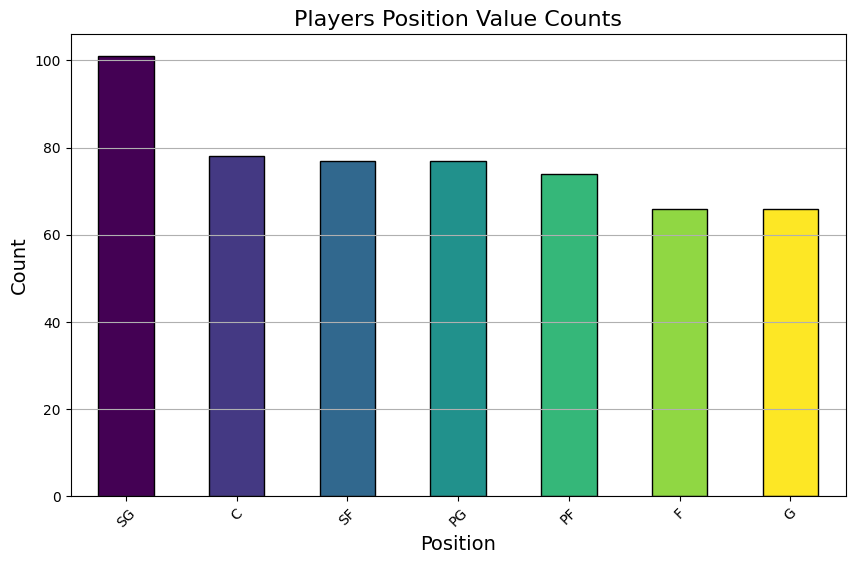

In [43]:
plt.figure(figsize=(10, 6))
position_counts = df['Position'].value_counts()

# Use a different colormap, e.g., 'viridis'
# or get a colormap using `plt.cm.get_cmap('viridis', len(position_counts))`
# and pass it to `color`
position_counts.plot(kind='bar', color=plt.cm.get_cmap('viridis', len(position_counts)).colors, edgecolor='black')

# Set the title and labels
plt.title('Players Position Value Counts', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Set dark background
plt.style.use('dark_background')

# Show the plot
plt.show()

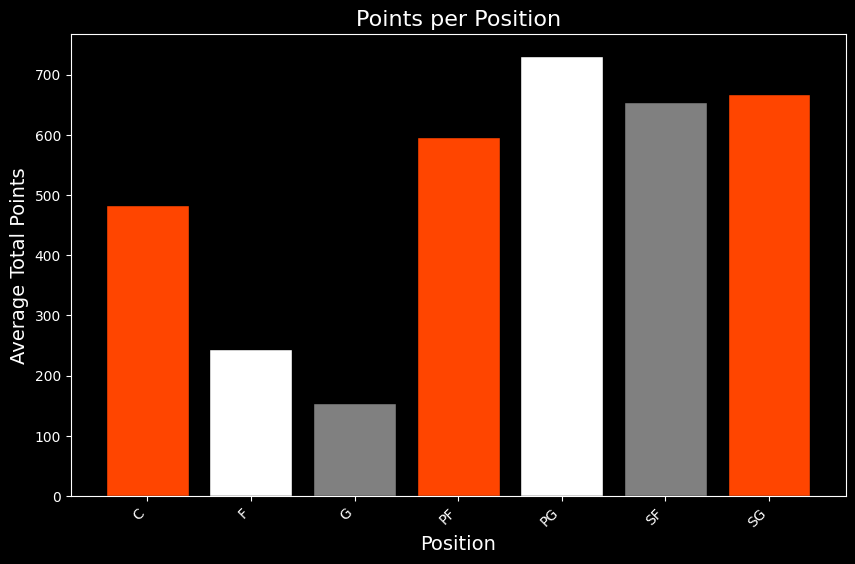

In [45]:
# Define colors for the bars
colors = ['orangered', 'white', 'grey', 'orangered', 'white', 'grey', 'orangered']
position_stats = df.groupby('Position')['Total_Points'].mean().reset_index()
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(position_stats['Position'], position_stats['Total_Points'], color=colors, edgecolor='black')

# Set the title and labels
plt.title('Points per Position', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Average Total Points', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set dark background
plt.style.use('dark_background')

# Show the plot
plt.show()

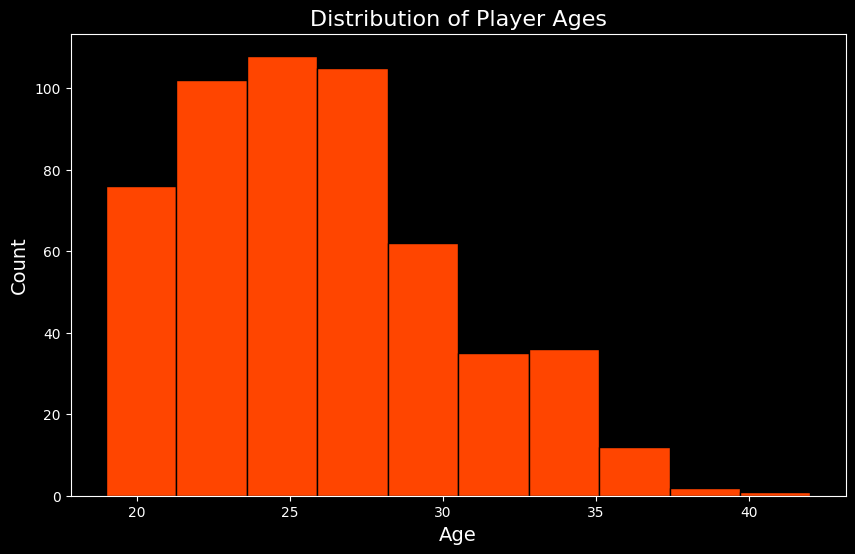

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], color='orangered', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Player Ages', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set dark background
plt.style.use('dark_background')

# Show the plot
plt.show()

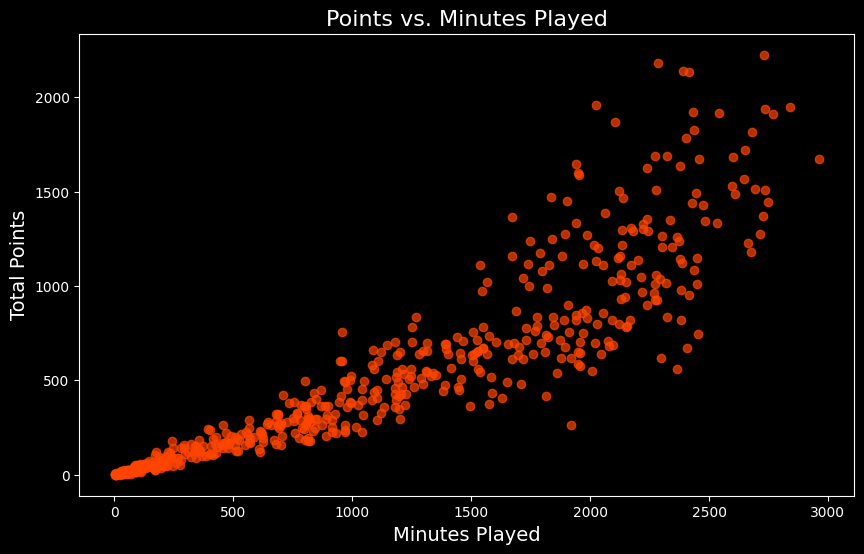

In [47]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Minutes_Played'], df['Total_Points'], color='orangered', alpha=0.7)

# Set the title and labels
plt.title('Points vs. Minutes Played', fontsize=16)
plt.xlabel('Minutes Played', fontsize=14)
plt.ylabel('Total Points', fontsize=14)

# Set dark background
plt.style.use('dark_background')

# Show the plot
plt.show()

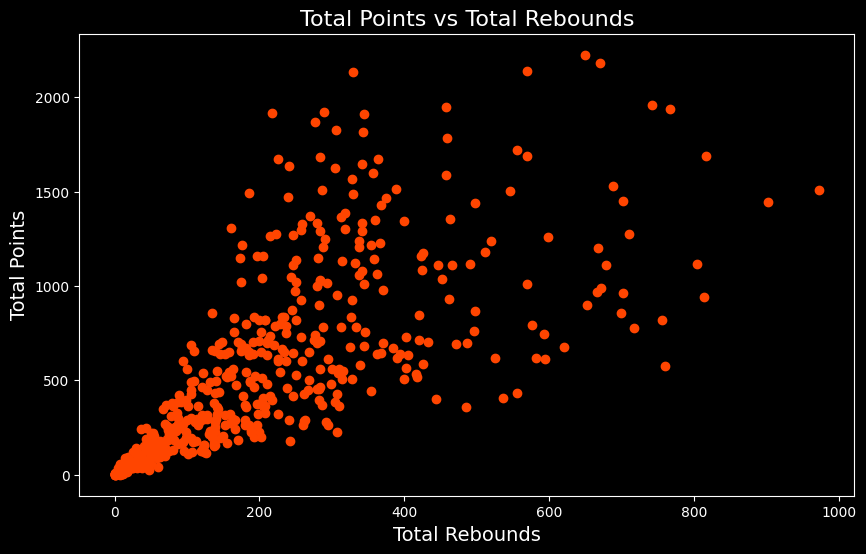

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Total_Rebounds'], df['Total_Points'], color='orangered')

# Set the title and labels
plt.title('Total Points vs Total Rebounds', fontsize=16)
plt.xlabel('Total Rebounds', fontsize=14)
plt.ylabel('Total Points', fontsize=14)

# Set dark background
plt.style.use('dark_background')

# Show the plot
plt.show()

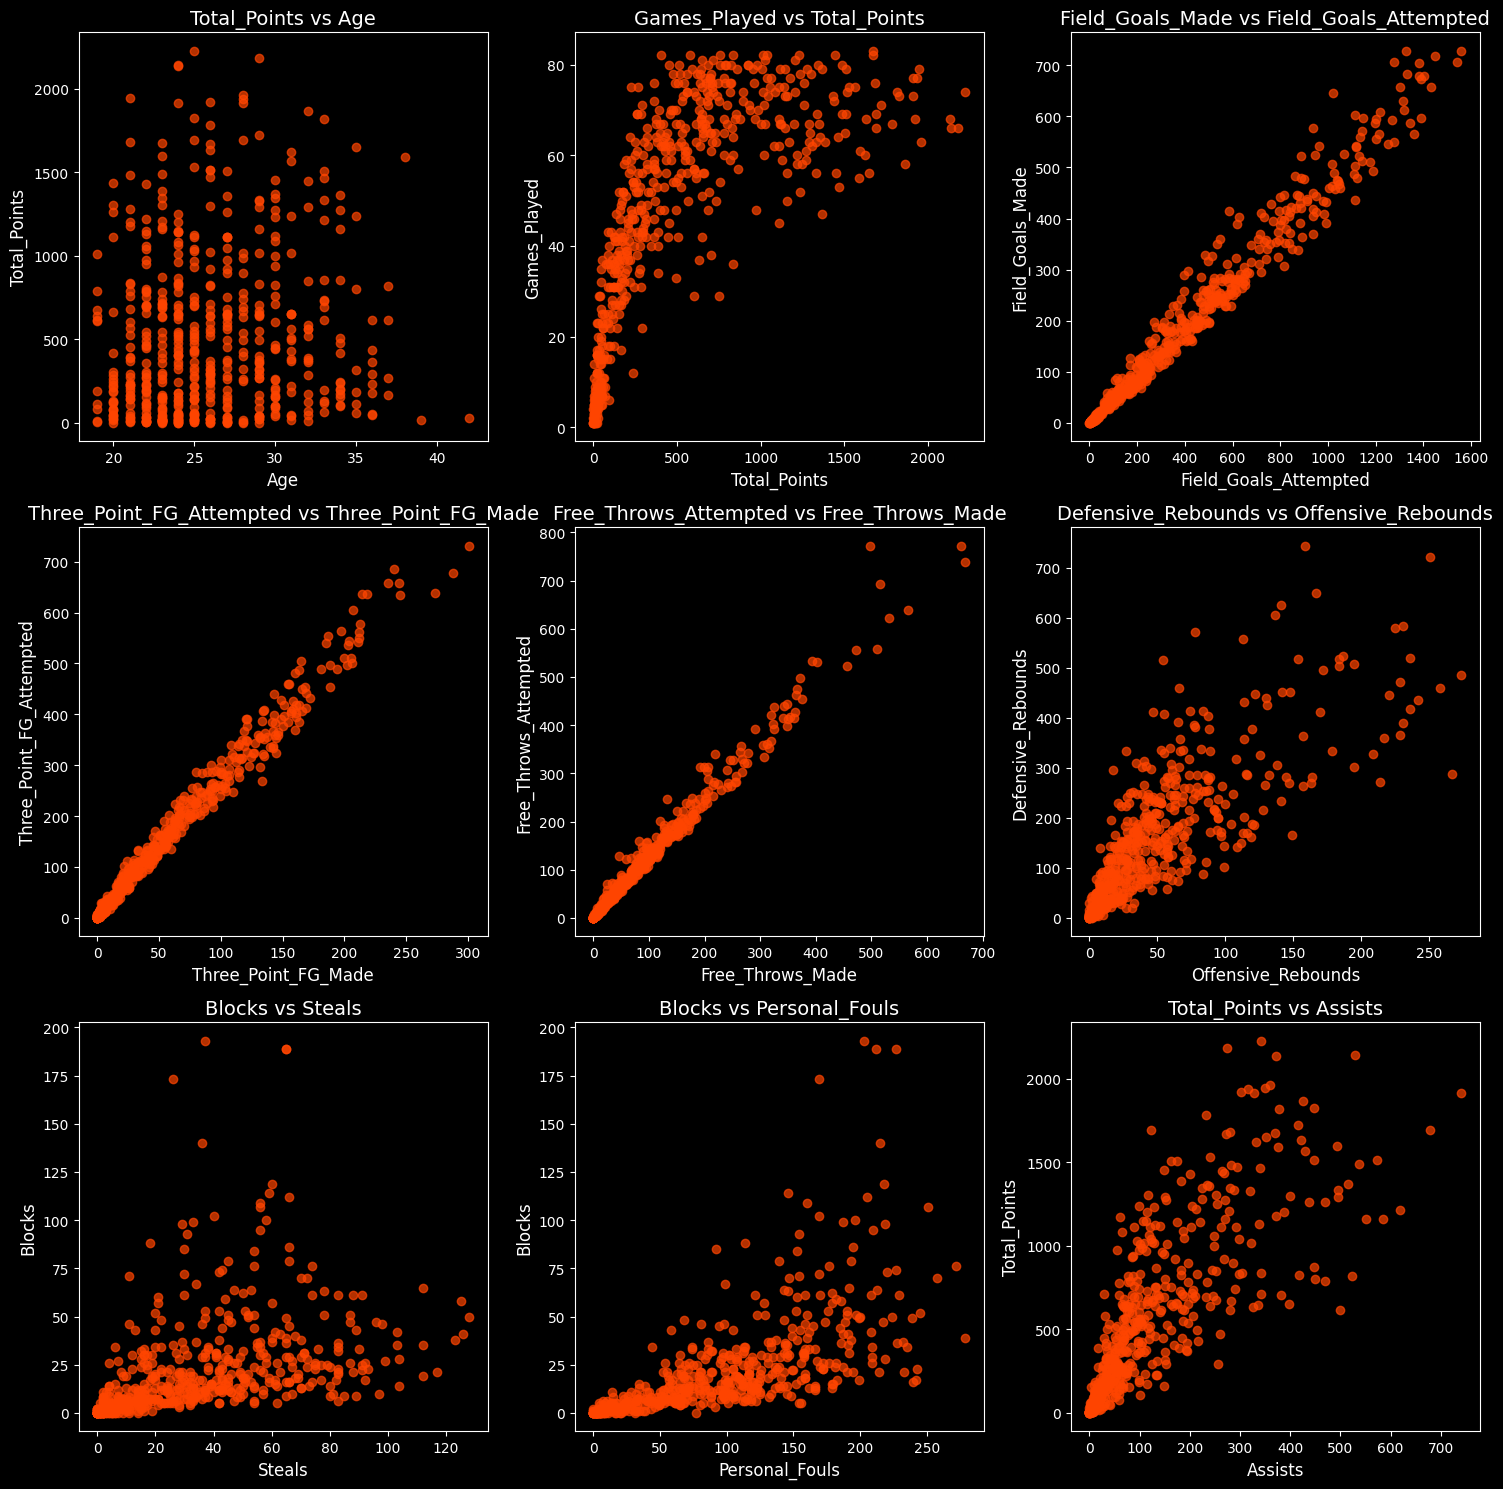

In [49]:
relationships = [ ('Age', 'Total_Points'), ('Total_Points', 'Games_Played'), ('Field_Goals_Attempted', 'Field_Goals_Made'), ('Three_Point_FG_Made', 'Three_Point_FG_Attempted'), ('Free_Throws_Made', 'Free_Throws_Attempted'), ('Offensive_Rebounds', 'Defensive_Rebounds'), ('Steals', 'Blocks'), ('Personal_Fouls', 'Blocks'), ('Assists', 'Total_Points') ]

# Define the number of rows and columns for the subplots
num_rows = 3
num_cols = 3

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate through the relationships and create scatter plots
for idx, (x_col, y_col) in enumerate(relationships):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    ax.scatter(df[x_col], df[y_col], color='orangered', alpha=0.7)  # Set color and opacity
    ax.set_xlabel(x_col, fontsize=12)  # Set x-axis label
    ax.set_ylabel(y_col, fontsize=12)  # Set y-axis label
    ax.set_title(f'{y_col} vs {x_col}', fontsize=14)  # Set title

# Adjust spacing between subplots
plt.tight_layout()

# Set dark background
plt.style.use('dark_background')

# Show the plot
plt.show()

In [50]:
outliers_condition = ((df['Field_Goal_Percentage'] > 90) |
                      (df['Field_Goal_Percentage'] == 0) |
                      (df['Three_Point_FG_Percentage'] > 90) |
                      (df['Three_Point_FG_Percentage'] == 0) |
                      (df['Free_Throw_Percentage'] == 0))

df = df[~outliers_condition]

In [51]:
df.drop(columns=['Player_Name', 'Position', 'Team_Abbreviation', 'Field_Goals_Made', 'Field_Goals_Attempted', 'Three_Point_FG_Made',
                 'Three_Point_FG_Attempted', 'Three_Point_FG_Percentage', 'NBA_Fantasy_Points', 'Double_Doubles','Free_Throws_Attempted',
                 'Triple_Doubles', 'Offensive_Rebounds', 'Defensive_Rebounds'],
        inplace=True)

In [52]:
X = df.drop('Total_Points',axis = 1)
y = df['Total_Points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [53]:
row, col = X_train.shape
print("X_train have",row,"rows and",col,"columns.")
row, col = X_test.shape
print("X_test have",row,"rows and",col,"columns.")

X_train have 376 rows and 15 columns.
X_test have 94 rows and 15 columns.


# Linear Regression

In [54]:
model = LinearRegression()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.2
Best random state: 43
Best R2 score: 0.9733468636997126


In [55]:
X_train, X_test , y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=.2, random_state=43)

LRmodel = LinearRegression(fit_intercept=True)
LRmodel.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = LRmodel.predict(X_test)
r2_score(y_test, y_pred)

0.9733468636997126

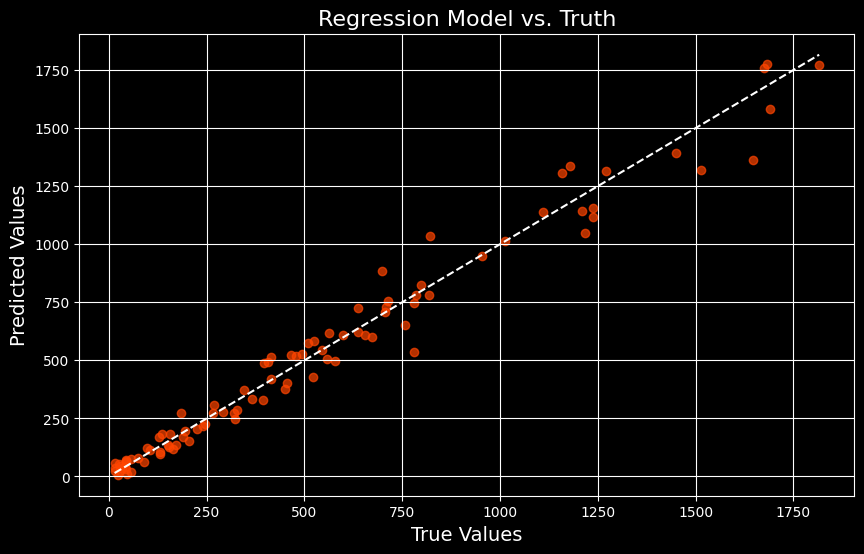

In [57]:
# prompt: plot the regression  model vs truth

import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your previous code
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='orangered', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='white')  # Add diagonal line
plt.xlabel("True Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Regression Model vs. Truth", fontsize=16)
plt.grid(True)
plt.style.use('dark_background')
plt.show()

# KNN

In [58]:
model = KNeighborsRegressor()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.25
Best random state: 0
Best R2 score: 0.9257710603941143


In [59]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=0.2, random_state=0)

KNNmodel = KNeighborsRegressor()

param_grid = {
    'n_neighbors': range(3,11,2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(estimator=KNNmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.9073155300538703
Best hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
R2 score on test set: 0.9121009410835088


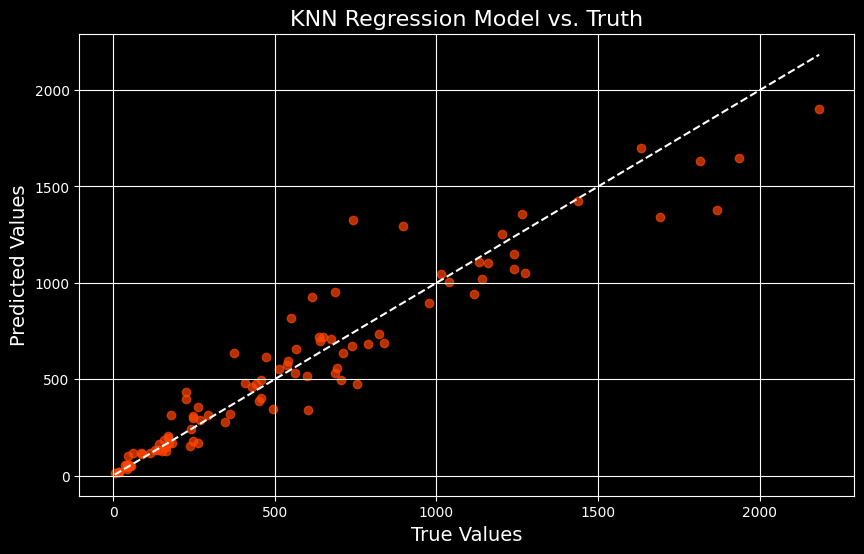

In [60]:
# prompt: plot the KNN

import matplotlib.pyplot as plt

# Assuming X_test and y_pred are defined from your KNN model training
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='orangered', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='white')  # Add diagonal line
plt.xlabel("True Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("KNN Regression Model vs. Truth", fontsize=16)
plt.grid(True)
plt.style.use('dark_background')
plt.show()

# Decision Tree

In [61]:
model = DecisionTreeRegressor()

test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.2
Best random state: 42
Best R2 score: 0.9405970297128288


In [62]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=0.15, random_state=100)

DTRmodel = DecisionTreeRegressor()
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [15, 20, 25, 30, 35],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

grid_search = GridSearchCV(estimator=DTRmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.9132578424548716
Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 15}
R2 score on test set: 0.955071689661187


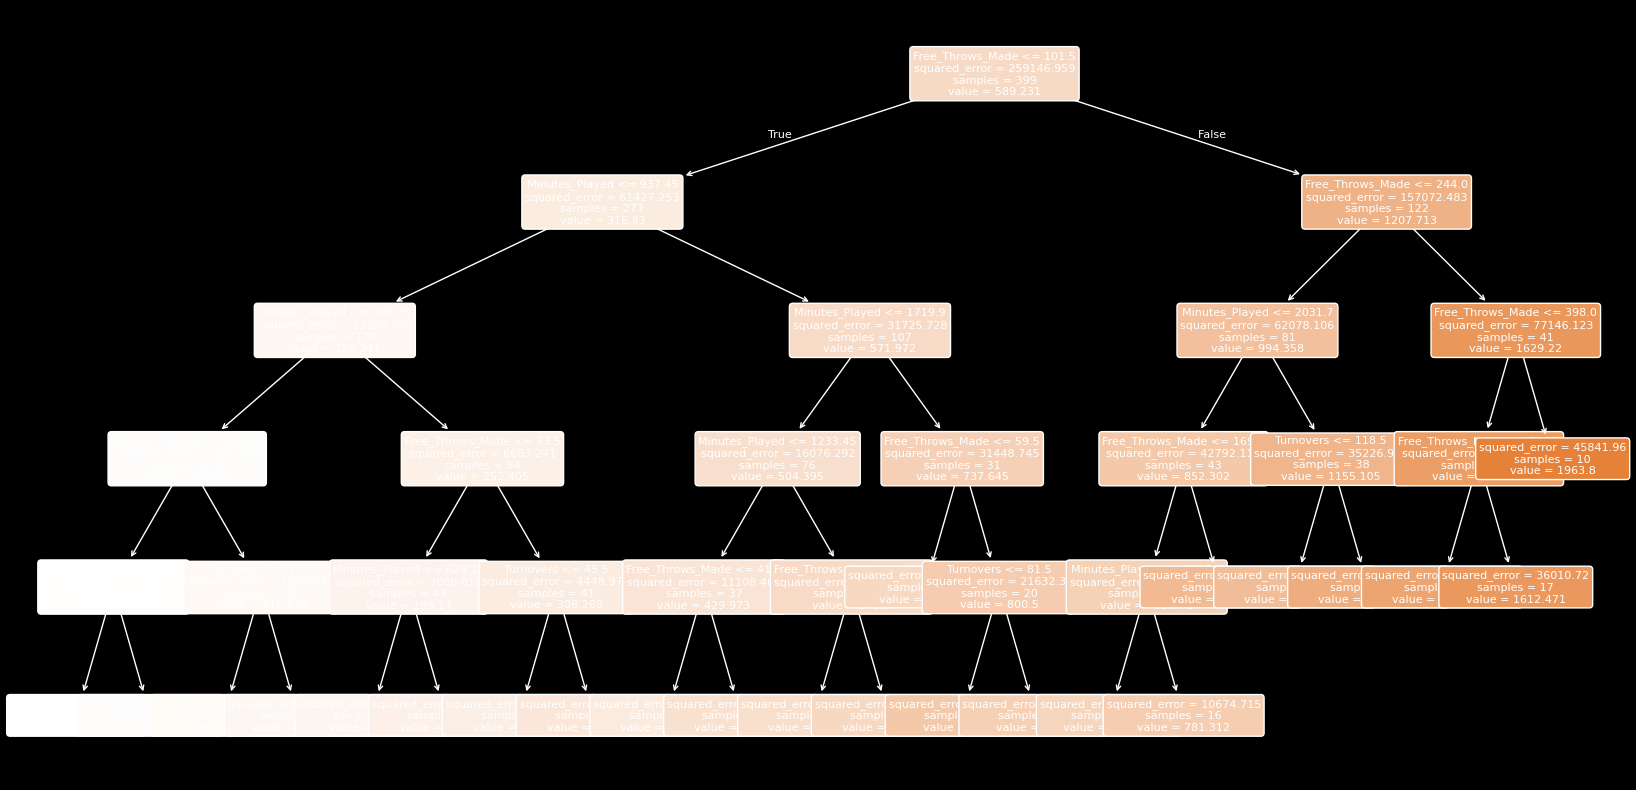

In [65]:
# prompt: plot decision tree with white background

from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
plt.style.use('default') # Use default style for white background
plt.show()

# Random Forest

In [66]:
test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=test_size, random_state=random_state)
        model = RandomForestRegressor(n_estimators=100, max_depth=5)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.1
Best random state: 0
Best R2 score: 0.9710520695655802


In [67]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=0.1, random_state=0)

RFRmodel = RandomForestRegressor()

param_grid = {
    'n_estimators': range(80,160,10),
    'max_depth': range(1,20,2),
}

grid_search = GridSearchCV(estimator=RFRmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_RFRmodel = grid_search.best_estimator_
y_pred = best_RFRmodel.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.9466698256230973
Best hyperparameters: {'max_depth': 15, 'n_estimators': 150}
R2 score on test set: 0.9703427014956797


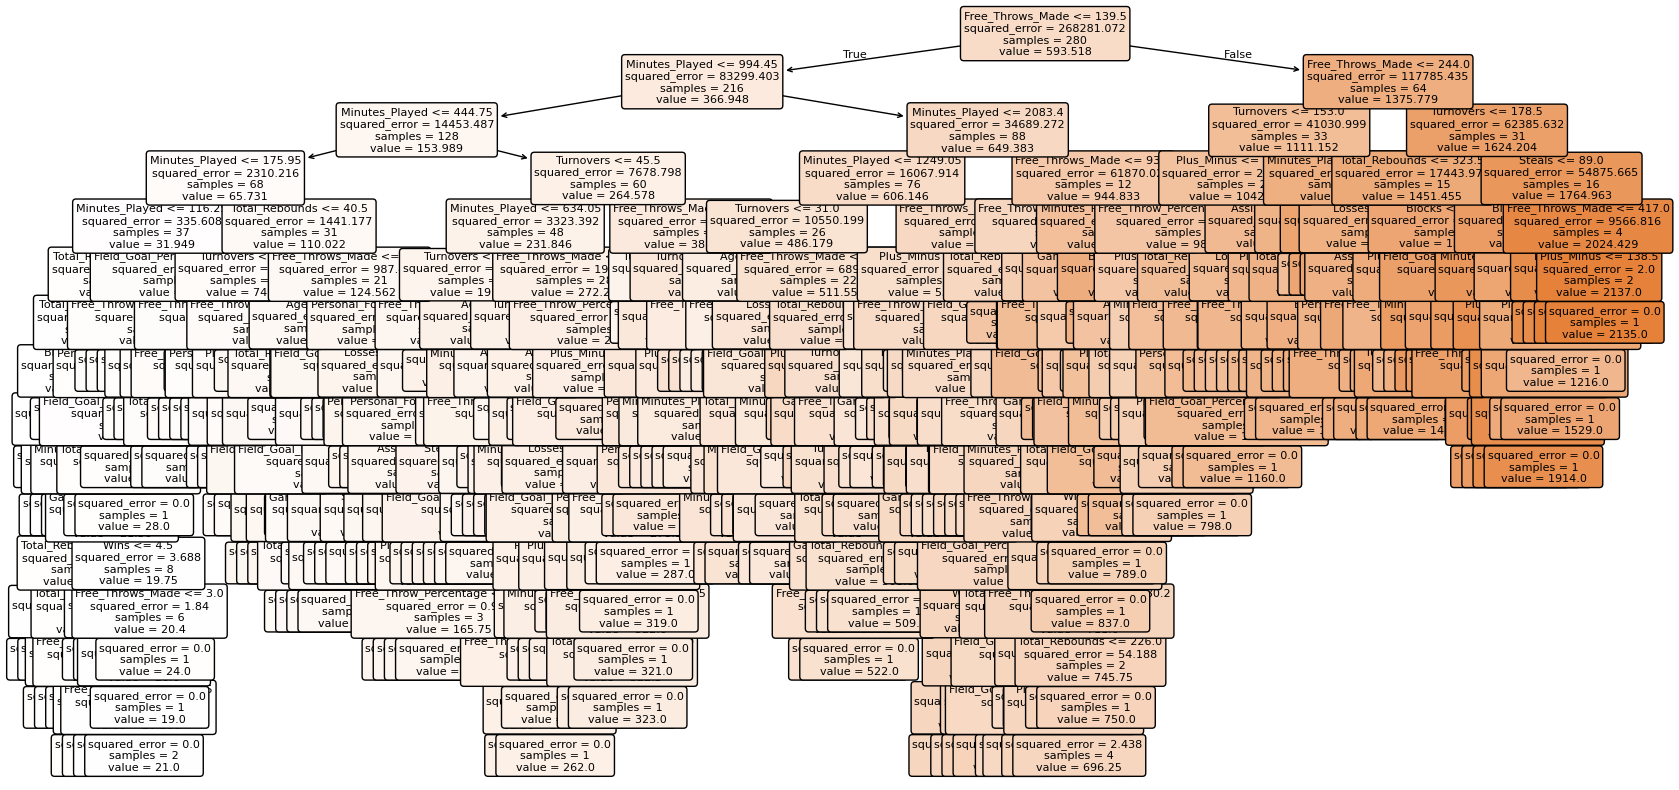

In [68]:
# prompt: plot random forest

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming best_RFRmodel is your trained RandomForestRegressor model and X is your feature data
plt.figure(figsize=(20,10))
# Plot the first tree in the forest
plot_tree(best_RFRmodel.estimators_[0], feature_names=X.columns, filled=True, rounded=True, fontsize=8)
plt.show()